In [60]:
from PIL import Image, ImageOps
import tensorflow as tf

import glob
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from skimage.feature import hog
import random
import pickle

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from keras.models import load_model
from sklearn import metrics

In [61]:
IMG_SIZE=28
#training image path
DATADIR = "D://PyProject//Training"    
CATEGORIES = ['char_a', 'char_b','char_c','char_d','char_e','char_f']
training_data = []
Final_arr = []
#feat_data1 = []

In [62]:
def create_training_data():#this inlcudes preprocessing steps : Grayscaling and Binarization
    for category in CATEGORIES:

        path = os.path.join(DATADIR, category)  # path to a and b
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            #i=i+1
            try:

                #GrayScaling
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                reh1, th1 = cv2.threshold(img_array, 0, 255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
                Final_arr = cv2.resize(th1, (IMG_SIZE, IMG_SIZE))
                training_data.append([Final_arr, class_num])
            except Exception as e:
                pass
            
create_training_data()

In [63]:
print('Shape: ',np.shape(training_data))
print('Total: ',len(training_data))

Shape:  (556, 2)
Total:  556


In [64]:
#training_data=feat_data1
no_of_data = len(training_data)
print(no_of_data)

556


In [65]:
X = []
y = []
for  features,label in training_data:
    X.append(features)
    y.append(label)

print(np.shape(X))
print(np.shape(y))
#print(X)
#X = np.array([X]).reshape(no_of_data,IMG_SIZE*IMG_SIZE)  # last one is because img is grayscaled(#27, 576)
#y = np.array([y]).reshape(no_of_data,)


(556, 28, 28)
(556,)


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(np.shape(X_train))
y_train[0]
X_train = np.array(X_train) 
X_test = np.array(X_test) 
y_train = np.array(y_train) 
y_test = np.array(y_test) 

(444, 28, 28)


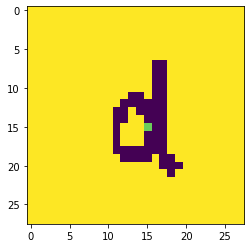

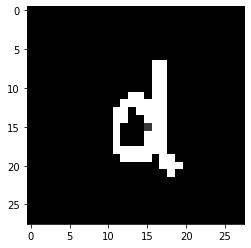

In [67]:
%matplotlib inline
plt.imshow(X_train[0])
plt.show()
plt.imshow(X_train[0], cmap = plt.cm.binary)

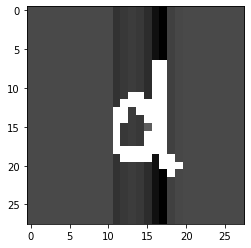

In [68]:
from keras.utils import np_utils
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)
plt.imshow(X_train[0], cmap = plt.cm.binary)

In [69]:
X_trainr = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_testr = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print('Training samples dimension: ', X_trainr.shape)
print('Testing samples dimension: ', X_testr.shape)

Training samples dimension:  (444, 28, 28, 1)
Testing samples dimension:  (112, 28, 28, 1)


In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [71]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X_trainr.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (2,2)))

model.add(Conv2D(64, (3,3), input_shape = X_trainr.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (2,2)))

model.add(Conv2D(64, (3,3), input_shape = X_trainr.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D( pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))


model.add(Dense(32))
model.add(Activation('relu'))


model.add(Dense(6))
model.add(Activation('softmax'))

In [72]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_18 (Activation)   (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_19 (Activation)   (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)         

In [73]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [74]:
model.fit(X_trainr, y_train, epochs = 44, validation_split = 0.3)

Epoch 1/44
10/10 [==============================] - 1s 39ms/step - loss: 1.7568 - accuracy: 0.2548 - val_loss: 1.7441 - val_accuracy: 0.1940
Epoch 2/44
10/10 [==============================] - 0s 24ms/step - loss: 1.7090 - accuracy: 0.2516 - val_loss: 1.7250 - val_accuracy: 0.1940
Epoch 3/44
10/10 [==============================] - 0s 27ms/step - loss: 1.6944 - accuracy: 0.2516 - val_loss: 1.7176 - val_accuracy: 0.1940
Epoch 4/44
10/10 [==============================] - 0s 27ms/step - loss: 1.6902 - accuracy: 0.2516 - val_loss: 1.7048 - val_accuracy: 0.1940
Epoch 5/44
10/10 [==============================] - 0s 25ms/step - loss: 1.6780 - accuracy: 0.2516 - val_loss: 1.6906 - val_accuracy: 0.1940
Epoch 6/44
10/10 [==============================] - 0s 25ms/step - loss: 1.6733 - accuracy: 0.2484 - val_loss: 1.6748 - val_accuracy: 0.2612
Epoch 7/44
10/10 [==============================] - 0s 27ms/step - loss: 1.6508 - accuracy: 0.2613 - val_loss: 1.6525 - val_accuracy: 0.1866
Epoch 8/44
10

In [75]:
'''path = 'C:/Users/Anurag/OneDrive/Desktop/another_b.png'
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
img1 = cv2.resize(img, (IMG_SIZE, IMG_SIZE), interpolation = cv2.INTER_AREA)
reh2, th2 = cv2.threshold(img1, 0, 255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
im2 = tf.keras.utils.normalize(th2, axis = 1)
plt.imshow(img1)'''

"path = 'C:/Users/Anurag/OneDrive/Desktop/another_b.png'\nimg = cv2.imread(path, cv2.IMREAD_GRAYSCALE)\nimg1 = cv2.resize(img, (IMG_SIZE, IMG_SIZE), interpolation = cv2.INTER_AREA)\nreh2, th2 = cv2.threshold(img1, 0, 255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)\nim2 = tf.keras.utils.normalize(th2, axis = 1)\nplt.imshow(img1)"

In [76]:
'''im2 = np.array(im2).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
pred  = model1.predict(im2)
print(np.argmax(pred))
p = np.argmax(pred)
if(p == [0]):
    print('Character a identified.')
elif(p == [1]):
    print("Character b identifed.")
elif(p == [2]):
    print("Character c identifed.")'''

'im2 = np.array(im2).reshape(-1, IMG_SIZE, IMG_SIZE, 1)\npred  = model1.predict(im2)\nprint(np.argmax(pred))\np = np.argmax(pred)\nif(p == [0]):\n    print(\'Character a identified.\')\nelif(p == [1]):\n    print("Character b identifed.")\nelif(p == [2]):\n    print("Character c identifed.")'

In [77]:
def predd(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img1 = cv2.resize(img, (IMG_SIZE, IMG_SIZE), interpolation = cv2.INTER_AREA)
    reh2, th2 = cv2.threshold(img1, 0, 255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    im2 = tf.keras.utils.normalize(th2, axis = 1)
    im2 = np.array(im2).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    pred  = model1.predict(im2)
    predicted = np.argmax(pred)
    
    return predicted
    #plt.imshow(img1)

In [78]:
#pickle.dump(model1,open('my_model.pkl','wb'))
model.save('my_model.h5')